In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Count all available logs
logs = UserLog.objects.all().order_by('timestamp').values_list('timestamp', flat=True)
logs.count()

84085

In [23]:
df = pd.DataFrame(list(logs))
df.columns = ["timestamp"]
df.head()

,timestamp
0,2018-09-25 18:40:25.424000+00:00
1,2018-09-25 18:40:53.569000+00:00
2,2018-09-25 23:35:51.837000+00:00
3,2018-09-26 15:31:29.395000+00:00
4,2018-09-26 15:34:59.061000+00:00


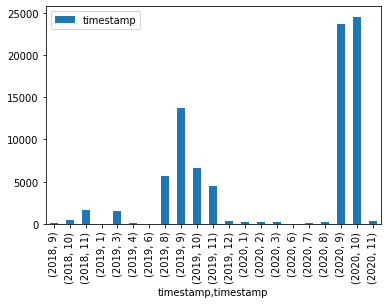

In [24]:
df.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).count().plot(kind="bar")

In [32]:
# Count useful logs
logs = UserLog.objects.exclude(console='').order_by('timestamp')
logs.count()

22515

In [33]:
df = pd.DataFrame(list(logs.values_list('timestamp', flat=True)))
df.columns = ["timestamp"]
df.head()

,timestamp
0,2020-08-04 14:24:02.882652+00:00
1,2020-08-04 14:24:17.981640+00:00
2,2020-08-04 14:24:29.623607+00:00
3,2020-08-04 14:24:47.695655+00:00
4,2020-08-04 18:40:46.293306+00:00


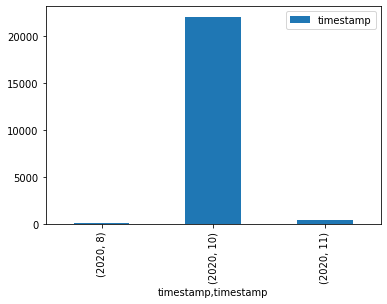

In [34]:
df.groupby([df["timestamp"].dt.year, df["timestamp"].dt.month]).count().plot(kind="bar")

### O log no console só foi inserido a partir de 10/2020

In [38]:
### Vamos filtrar somente os que não passaram
logs_failed = logs.filter(outcome='F')
logs_failed.count()

18298

In [41]:
### Vamos filtrar somente os que apresentam erro
logs_failed = logs.filter(outcome='F', console__icontains='error')
logs_failed.count()

9784

In [97]:
all_users = []
for idx, log in enumerate(logs_failed):
    user_errors = log.console.split('\n')  
    clean_errors = list(set([error.split(":")[0] for error in user_errors if "Error" in error.split(":")[0]]))
    all_users += clean_errors

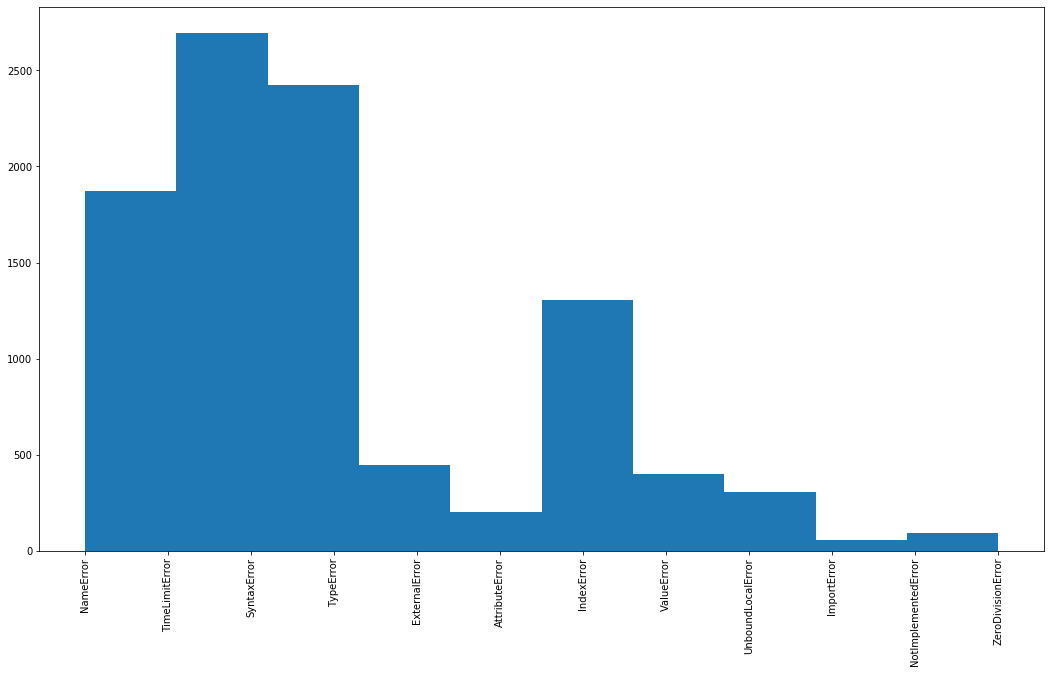

In [98]:
plt.figure(figsize=(18,10))
plt.hist(all_users)
plt.xticks(rotation=90)
plt.show()